<a href="https://colab.research.google.com/github/ShreyasSubhedar/Deep_Learning/blob/master/Sigmoid_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load Data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, log_loss
import operator
import json
from IPython import display
import os
import warnings
# demonstrate data normalization with sklearn
from tqdm import tqdm_notebook
np.random.seed(0)
warnings.filterwarnings("ignore")
THRESHOLD = 5

# Sigmoid Class 

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True,loss_plot=True):
    loss={}
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in tqdm_notebook(range(epochs),total=epochs,unit="Epochs"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      if loss_plot:
        Y_pred =self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    if loss_plot:
      plt.plot( np.array(list(loss.values())).astype(float))
      plt.xlabel('Epoches')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_prd = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_prd)
    return np.array(Y_pred)

In [569]:
# read data from file
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])

Number of data points in train: 355
Number of features in train: 99
Number of data points in test: 119
Number of features in test: 98


In [0]:
def data_clean(data):
    
    # Let's first remove all missing value features
    columns_to_remove = ['Also Known As','Applications','Audio Features','Bezel-less display'
                         'Browser','Build Material','Co-Processor','Browser'
                         'Display Colour','Mobile High-Definition Link(MHL)',
                         'Music', 'Email','Fingerprint Sensor Position',
                         'Games','HDMI','Heart Rate Monitor','IRIS Scanner', 
                         'Optical Image Stabilisation','Other Facilities',
                         'Phone Book','Physical Aperture','Quick Charging',
                         'Ring Tone','Ruggedness','SAR Value','SIM 3','SMS',
                         'Screen Protection','Screen to Body Ratio (claimed by the brand)',
                         'Sensor','Software Based Aperture', 'Special Features',
                         'Standby time','Stylus','TalkTime', 'USB Type-C',
                         'Video Player', 'Video Recording Features','Waterproof',
                         'Wireless Charging','USB OTG Support', 'Video Recording','Java']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    #Features having very low variance 
    columns_to_remove = ['Architecture','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Multivalued:
    columns_to_remove = ['Architecture','Launch Date','Audio Jack','GPS','Loudspeaker','Network','Network Support','VoLTE', 'Custom UI']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    # Not much important
    columns_to_remove = ['Bluetooth', 'Settings','Wi-Fi','Wi-Fi Features']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]
    
    return data

In [0]:
train = data_clean(train)
test = data_clean(test)

In [0]:
train = train[(train.isnull().sum(axis=1) <= 15)]
# You shouldn't remove data points from test set
#test = test[(test.isnull().sum(axis=1) <= 15)]

In [0]:
def for_integer(test):
    try:
        test = test.strip()
        return int(test.split(' ')[0])
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass

def for_string(test):
    try:
        test = test.strip()
        return (test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

def for_float(test):
    try:
        test = test.strip()
        return float(test.split(' ')[0])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass

    
def for_Internal_Memory(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[1] == 'GB':
            return int(test[0])
        if test[1] == 'MB':
#             print("here")
            return (int(test[0]) * 0.001)
    except IOError:
           pass
    except ValueError:
        pass
    except:
        pass
    
def find_freq(test):
    try:
        test = test.strip()
        test = test.split(' ')
        if test[2][0] == '(':
            return float(test[2][1:])
        return float(test[2])
    except IOError:
        pass
    except ValueError:
        pass
    except:
        pass


In [0]:
def data_clean_2(x):
    data = x.copy()
    
    data['Capacity'] = data['Capacity'].apply(for_integer)

    data['Height'] = data['Height'].apply(for_float)
    data['Height'] = data['Height'].fillna(data['Height'].mean())

    data['Internal Memory'] = data['Internal Memory'].apply(for_Internal_Memory)

    data['Pixel Density'] = data['Pixel Density'].apply(for_integer)

    data['Internal Memory'] = data['Internal Memory'].fillna(data['Internal Memory'].median())
    data['Internal Memory'] = data['Internal Memory'].astype(int)

    data['RAM'] = data['RAM'].apply(for_integer)
    data['RAM'] = data['RAM'].fillna(data['RAM'].median())
    data['RAM'] = data['RAM'].astype(int)

    data['Resolution'] = data['Resolution'].apply(for_integer)
    data['Resolution'] = data['Resolution'].fillna(data['Resolution'].median())
    data['Resolution'] = data['Resolution'].astype(int)

    data['Screen Size'] = data['Screen Size'].apply(for_float)

    data['Thickness'] = data['Thickness'].apply(for_float)
    data['Thickness'] = data['Thickness'].fillna(data['Thickness'].mean())
    data['Thickness'] = data['Thickness'].round(2)

    data['Type'] = data['Type'].fillna('Li-Polymer')

    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].apply(for_float)
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].fillna(data['Screen to Body Ratio (calculated)'].mean())
    data['Screen to Body Ratio (calculated)'] = data['Screen to Body Ratio (calculated)'].round(2)

    data['Width'] = data['Width'].apply(for_float)
    data['Width'] = data['Width'].fillna(data['Width'].mean())
    data['Width'] = data['Width'].round(2)

    data['Flash'][data['Flash'].isna() == True] = "Other"

    data['User Replaceable'][data['User Replaceable'].isna() == True] = "Other"

    data['Num_cores'] = data['Processor'].apply(for_string)
    data['Num_cores'][data['Num_cores'].isna() == True] = "Other"


    data['Processor_frequency'] = data['Processor'].apply(find_freq)
    #because there is one entry with 208MHz values, to convert it to GHz
    data['Processor_frequency'][data['Processor_frequency'] > 200] = 0.208
    data['Processor_frequency'] = data['Processor_frequency'].fillna(data['Processor_frequency'].mean())
    data['Processor_frequency'] = data['Processor_frequency'].round(2)

    data['Camera Features'][data['Camera Features'].isna() == True] = "Other"

    #simplifyig Operating System to os_name for simplicity
    data['os_name'] = data['Operating System'].apply(for_string)
    data['os_name'][data['os_name'].isna() == True] = "Other"

    data['Sim1'] = data['SIM 1'].apply(for_string)

    data['SIM Size'][data['SIM Size'].isna() == True] = "Other"

    data['Image Resolution'][data['Image Resolution'].isna() == True] = "Other"

    data['Fingerprint Sensor'][data['Fingerprint Sensor'].isna() == True] = "Other"

    data['Expandable Memory'][data['Expandable Memory'].isna() == True] = "No"

    data['Weight'] = data['Weight'].apply(for_integer)
    data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
    data['Weight'] = data['Weight'].astype(int)

    data['SIM 2'] = data['SIM 2'].apply(for_string)
    data['SIM 2'][data['SIM 2'].isna() == True] = "Other"
    
    return data

In [575]:
train = data_clean_2(train)
test = data_clean_2(test)

# check the number of features and data points in train
print("Number of data points in train: %d" % train.shape[0])
print("Number of features in train: %d" % train.shape[1])

# check the number of features and data points in test
print("Number of data points in test: %d" % test.shape[0])
print("Number of features in test: %d" % test.shape[1])


Number of data points in train: 341
Number of features in train: 51
Number of data points in test: 119
Number of features in test: 50


In [0]:
def data_clean_3(x):
    
    data = x.copy()

    columns_to_remove = ['User Available Storage','SIM Size','Chipset','Processor','Autofocus','Aspect Ratio','Touch Screen',
                        'Bezel-less display','Operating System','SIM 1','USB Connectivity','Other Sensors','Graphics','FM Radio',
                        'NFC','Shooting Modes','Browser','Display Colour' ]

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = [ 'Screen Resolution','User Replaceable','Camera Features',
                        'Thickness', 'Display Type']

    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]


    columns_to_remove = ['Fingerprint Sensor', 'Flash', 'Rating Count', 'Review Count','Image Resolution','Type','Expandable Memory',\
                        'Colours','Width','Model']
    columns_to_retain = list(set(data.columns)-set(columns_to_remove))
    data = data[columns_to_retain]

    return data

In [577]:
# one hot encoding

train_ids = train['PhoneId']
test_ids = test['PhoneId']

cols = list(test.columns)
cols.remove('PhoneId')
cols.insert(0, 'PhoneId')

combined = pd.concat([train.drop('Rating', axis=1)[cols], test[cols]])
print(combined.shape)
print(combined.columns)

combined = pd.get_dummies(combined)
print(combined.shape)
print(combined.columns)

train_new = combined[combined['PhoneId'].isin(train_ids)]
test_new = combined[combined['PhoneId'].isin(test_ids)]


(460, 50)
Index(['PhoneId', 'SIM 2', 'Shooting Modes', 'Other Sensors', 'Thickness',
       'Rating Count', 'Processor', 'Graphics', 'Colours', 'Internal Memory',
       'Model', 'User Replaceable', 'Review Count', 'Brand', 'Height',
       'SIM Size', 'Bezel-less display', 'Chipset', 'Display Colour', 'Flash',
       'Image Resolution', 'RAM', 'SIM Slot(s)', 'USB Connectivity', 'SIM 1',
       'Operating System', 'Fingerprint Sensor', 'Screen Resolution',
       'User Available Storage', 'Aspect Ratio', 'Camera Features',
       'Display Type', 'Expandable Memory', 'Touch Screen', 'Resolution',
       'Type', 'Screen Size', 'Capacity', 'Browser', 'Width', 'FM Radio',
       'Weight', 'Autofocus', 'Screen to Body Ratio (calculated)',
       'Pixel Density', 'NFC', 'Num_cores', 'Processor_frequency', 'os_name',
       'Sim1'],
      dtype='object')
(460, 1857)
Index(['PhoneId', 'Thickness', 'Rating Count', 'Internal Memory',
       'Review Count', 'Height', 'RAM', 'Resolution', 'Screen 

In [0]:
train_new = train_new.merge(train[['PhoneId', 'Rating']], on='PhoneId')

In [579]:
# check the number of features and data points in train
print("Number of data points in train: %d" % train_new.shape[0])
print("Number of features in train: %d" % train_new.shape[1])
# check the number of features and data points in test
print("Number of data points in test: %d" % test_new.shape[0])
print("Number of features in test: %d" % test_new.shape[1])

Number of data points in train: 341
Number of features in train: 1858
Number of data points in test: 119
Number of features in test: 1857


In [580]:
train_new.head()

,PhoneId,Thickness,Rating Count,Internal Memory,Review Count,Height,RAM,Resolution,Screen Size,Capacity,Width,Weight,Screen to Body Ratio (calculated),Pixel Density,Processor_frequency,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Shooting Modes_Continuos Shooting,"Shooting Modes_Continuos Shooting, Burst mode","Shooting Modes_Continuos Shooting, High Dynamic Range mode (HDR)","Shooting Modes_Continuos Shooting, High Dynamic Range mode (HDR), Burst mode",Shooting Modes_High Dynamic Range mode (HDR),"Shooting Modes_High Dynamic Range mode (HDR), Burst mode",Other Sensors_Accelerometer,"Other Sensors_Light sensor, Accelerometer","Other Sensors_Light sensor, Accelerometer, Compass, Gyroscope","Other Sensors_Light sensor, Proximity sensor, Accelerometer","Other Sensors_Light sensor, Proximity sensor, Accelerometer, Barometer, Compass, Gyroscope","Other Sensors_Light sensor, Proximity sensor, Accelerometer, Barometer, Gyroscope","Other Sensors_Light sensor, Proximity sensor, Accelerometer, Compass","Other Sensors_Light sensor, Proximity sensor, Accelerometer, Compass, Gyroscope","Other Sensors_Light sensor, Proximity sensor, Accelerometer, Gyroscope","Other Sensors_Light sensor, Proximity sensor, rgbw sensor, Accelerometer, Barometer, Compass, Gyroscope","Other Sensors_Light sensor, Proximity sensor, rgbw sensor, Accelerometer, Compass","Other Sensors_Proximity sensor, Accelerometer","Other Sensors_Proximity sensor, Accelerometer, Compass","Other Sensors_Proximity sensor, Accelerometer, Compass, Gyroscope",Processor_312 MHz,...,FM Radio_Recording option,"FM Radio_Recording option, Wireless FM",FM Radio_Stereo FM,FM Radio_Wireless FM,FM Radio_yes,Autofocus_Assist Beam autofocus,Autofocus_Dual Pixel autofocus,Autofocus_Hybrid autofocus,"Autofocus_Hybrid autofocus, Phase Detection autofocus","Autofocus_Hybrid autofocus, Phase Detection autofocus, Laser autofocus",Autofocus_Laser autofocus,Autofocus_No,Autofocus_Phase Detection autofocus,"Autofocus_Phase Detection autofocus, Continuos autofocus","Autofocus_Phase Detection autofocus, Continuos autofocus, Laser autofocus","Autofocus_Phase Detection autofocus, Dual Pixel autofocus, Laser autofocus","Autofocus_Phase Detection autofocus, Dual Pixel autofocus, Selective Focus autofocus","Autofocus_Phase Detection autofocus, Laser autofocus",Autofocus_yes,NFC_No,NFC_yes,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,8.2,172274,64,17138,157.9,4,20,6.26,4000,76.4,182,80.68,403,1.8,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,4.5
1,1,8.2,339447,32,38252,156.2,3,8,6.20,4230,75.6,168,80.85,271,1.8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,4.5
2,2,8.0,1149,32,1151,157.0,3,25,6.30,3500,74.0,168,83.68,409,2.1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,4.4
3,4,7.5,6026,64,779,159.8,4,24,6.00,3300,76.8,169,74.78,411,2.2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,4.3
4,5,7.8,5175,64,5177,160.4,4,16,6.50,3750,76.6,175,84.23,396,2.2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,4.4


In [581]:
X = train_new.drop('Rating', axis=1)
Y =train_new['Rating'].values
print(Y.shape)

(341,)


In [0]:
train_new['class'] = (train_new['Rating']>= THRESHOLD).astype(np.int64)

In [583]:
train_new['class']

0      0
1      0
2      0
3      0
4      0
      ..
336    0
337    0
338    0
339    0
340    0
Name: class, Length: 341, dtype: int64

In [584]:
train_new['class'].value_counts(normalize=True)

0    0.994135
1    0.005865
Name: class, dtype: float64

In [0]:
Y_binarized = train_new['class'].values

3 main dataframes:
1: X which contains the train data
2: Y = real ratings
3: Y_binarized = binarized ratings.

#Satandardisation

In [0]:

from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(train_new,Y,random_state=0,stratify=Y_binarized)

In [588]:
print(X_train.shape, X_test.shape,Y_train.shape,Y_test.shape)

(255, 1859) (86, 1859) (255,) (86,)


In [0]:
scalar = StandardScaler()
X_scaled_train=scalar.fit_transform(X_train)
X_scaled_test =scalar.transform(X_test)

In [0]:
minmaxScalar = MinMaxScaler()


In [0]:
Y_scaled_train = minmaxScalar.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmaxScalar.transform(Y_test.reshape(-1,1))

In [592]:
scaled_threshold = list(minmaxScalar.transform(np.array([THRESHOLD]).reshape(-1,1)))[0][0]
print(scaled_threshold)

1.0


In [593]:
Y_binarized_train = (Y_scaled_train>=scaled_threshold).astype(int).ravel()
Y_binarized_test = (Y_scaled_test>=scaled_threshold).astype(int).ravel()
print(Y_binarized_train.shape)
print(Y_binarized_test.shape)

(255,)
(86,)


# Applying Fit function

In [0]:
sn = SigmoidNeuron()

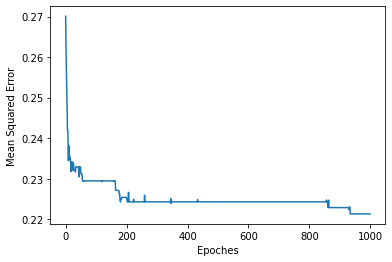

In [595]:
sn.fit(X_scaled_train,Y_scaled_train,epochs=1000,learning_rate=1.5,loss_plot=True)

In [596]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)
print(Y_pred_train.shape)

(255, 1)


In [597]:
Y_pred_binarized_train = (Y_pred_train>scaled_threshold).astype(int)
Y_pred_binarized_test = (Y_pred_test>scaled_threshold).astype(int)
print(Y_pred_binarized_train.shape, Y_binarized_train.shape)

(255, 1) (255,)


In [598]:
accuracy_train = accuracy_score(Y_pred_binarized_train,Y_binarized_train)
print(accuracy_train)
accuracy_test = accuracy_score(Y_pred_binarized_test,Y_binarized_test)
print(accuracy_test)

0.996078431372549
0.9883720930232558


## changing Thershold
<table >
<th>NO</th>
<th>THRESHOLD</th>

<th>Accuracy of training data</th>
<th>Accuracy of testing data</th>
<tr>
<td>1</td>
<td>3.5</td>
<td>55.55</td>
<td>59.88</td>
</tr>
<tr>
<td>2</td>
<td>4</td>
<td>66.33</td>
<td>70.04</td>
</tr>
<tr>
<td>3</td>
<td>4.2</td>
<td>73.33</td>
<td>86.88</td>
</tr>
<tr>
<td>4</td>
<td>4.4</td>
<td>56.13</td>
<td>66.674</td>
</tr>
<tr>
<td>5</td>
<td>5</td>
<td>99</td>
<td>98</td>
<td>lolz XD</td>
</tr>
</table>



## Changing Hyper-Parameter
<table >
<th>NO</th>
<th>Epochs</th>
<th>Leanring Rate</th>
<th>MSE</th>
<th>Accuracy of training data</th>
<th>Accuracy of testing data</th>
<tr>
<td>1</td>
<td>1000</td>
<td>1.5</td>
<td>0.25</td>
<td>71.76</td>
<td>84.88</td>
</tr>
<tr>
<td>2</td>
<td>3000</td>
<td>1.5</td>
<td>0.1987</td>
<td>73.33</td>
<td>86.04</td>
</tr>
<tr>
<td>3</td>
<td>5000</td>
<td>1.25</td>
<td>0.23</td>
<td>74.33</td>
<td>84.88</td>
</tr>
<tr>
<td>4</td>
<td>10000</td>
<td>0.01</td>
<td>0.22</td>
<td>56.13</td>
<td>66.674</td>
</tr>
<tr>
<td>5</td>
<td>10000</td>
<td>1.5</td>
<td>0.27</td>
<td>73.33</td>
<td>84.88</td>
</tr>
</table>